<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_004_two_sample_one_tailed_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Introduction to One-Tailed Two-Sample T-Tests**

#### **Purpose of This Notebook**
This notebook focuses on performing and interpreting **one-tailed two-sample t-tests**, which are used to compare the means of two independent groups when the hypothesis specifies a **directional difference** (e.g., one group is expected to have a higher or lower mean than the other).

---

#### **What You’ll Learn**
1. **Understanding One-Tailed Tests**:
   - How one-tailed tests differ from two-tailed tests in terms of hypotheses and interpretation.
   - The advantages and limitations of using one-tailed tests.

2. **Formulating Hypotheses**:
   - How to construct null (\(H_0\)) and alternative (\(H_1\)) hypotheses for one-tailed comparisons.

3. **Performing One-Tailed T-Tests**:
   - Applying Python tools to conduct one-tailed t-tests.
   - Interpreting t-statistics and p-values in the context of directional hypotheses.

---

#### **Applications of One-Tailed T-Tests**
- **Healthcare**: Testing if a new drug leads to a greater reduction in blood pressure compared to a placebo.
- **Education**: Evaluating whether a new teaching method produces higher test scores than traditional methods.
- **Marketing**: Determining if a new advertising strategy generates more sales than a previous strategy.
- **Manufacturing**: Checking if a new process reduces defect rates compared to the existing process.

For a **one-tailed test**, the critical p-value threshold (\(\alpha\)) remains **0.05** by convention. However, the interpretation of the p-value differs compared to a two-tailed test:

---

### **Why the p-value Threshold is Still 0.05**
1. **Directional Hypothesis**:
   - A one-tailed test specifies a direction (e.g., "Group A is greater than Group B").
   - The entire significance level (\( \alpha = 0.05 \)) is allocated to the single tail of interest in the distribution.

2. **Two-Tailed vs. One-Tailed**
   - In a two-tailed test:
     - The significance level (\( \alpha \)) is split equally across both tails (0.025 in each tail).
     - A two-tailed test rejects the null hypothesis if the p-value is less than 0.025 in either direction.
   - In a one-tailed test:
     - All \( \alpha = 0.05 \) is allocated to one tail.
     - A one-tailed test rejects the null hypothesis if the p-value is less than 0.05 in the specified direction.

---

### **Key Distinction**
- The critical region (rejection area) for a one-tailed test is **entirely in one tail**.
- The **numerical p-value threshold** for rejection is the same \(0.05\) as a two-tailed test, but the allocation and interpretation differ.


### Load Iris Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
# Convert to a DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({i: name for i, name in enumerate(iris.target_names)})
# iris_df['species'] = iris_df['species'].astype('category')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### **Question**  
Is the average petal length of `setosa` significantly less than that of `versicolor`?

---

### **One-Tailed T-Test**  
- **Null Hypothesis (\(H_0\))**: The average petal length of `setosa` is greater than or equal to the average petal length of `versicolor`.  
- **Alternative Hypothesis (\(H_1\))**: The average petal length of `setosa` is less than the average petal length of `versicolor`.

---

### **Results**  
- **T-Statistic**: \(-39.49\)  
- **One-Tailed P-Value**: \(0.0000\)  

---

### **Interpretation**
- The p-value (\(0.0000\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  
- This means that the average petal length of `setosa` is significantly less than that of `versicolor`.

---

### **Visualization Summary**  
- The KDE plot shows a clear separation between the distributions of petal length for `setosa` and `versicolor`.  
- The dashed mean lines further highlight the difference in average petal lengths, with `setosa` having a noticeably lower mean.  

---

### **Conclusion**  
The statistical and visual analysis confirms that the average petal length of `setosa` is significantly less than that of `versicolor`. This supports the directional hypothesis with strong evidence.



One-Tailed T-Test:
T-Statistic: -39.49
One-Tailed P-Value: 0.0000
Conclusion: Reject the null hypothesis. The average petal length of setosa is significantly less than that of versicolor.




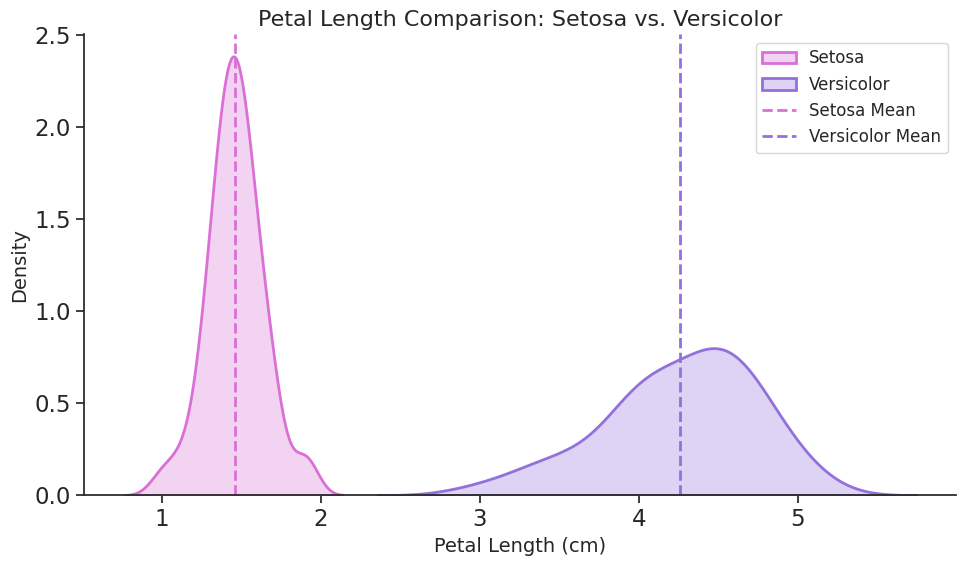

In [7]:
from scipy.stats import ttest_ind

# Extract petal length data for the two groups
setosa_petal_length = iris_df[iris_df['species'] == 'setosa']['petal length (cm)']
versicolor_petal_length = iris_df[iris_df['species'] == 'versicolor']['petal length (cm)']

# Perform a two-sample t-test (two-tailed)
t_stat, p_value_two_tailed = ttest_ind(setosa_petal_length, versicolor_petal_length, alternative='two-sided')

# Convert to one-tailed p-value (testing "less than")
if t_stat < 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

# Output results
print("One-Tailed T-Test:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"One-Tailed P-Value: {p_value_one_tailed:.4f}")

# Interpretation
alpha = 0.05
if p_value_one_tailed <= alpha:
    print("Conclusion: Reject the null hypothesis. The average petal length of setosa is significantly less than that of versicolor.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant evidence that the petal length of setosa is less than that of versicolor.")
print('\n')

# Set Seaborn theme, style, and palette
theme_style = "ticks"
palette_name = "Pastel1_r"
context_scale = "notebook"

sns.set_theme(style=theme_style, palette=palette_name)
sns.set_context(context_scale, font_scale=1.5, rc={"lines.linewidth": 2.5})

# Extract petal length data for the two groups
setosa_petal_length = iris_df[iris_df['species'] == 'setosa']['petal length (cm)']
versicolor_petal_length = iris_df[iris_df['species'] == 'versicolor']['petal length (cm)']

# Visualization
plt.figure(figsize=(10, 6))

# KDE plot for each species
sns.kdeplot(setosa_petal_length, fill=True, alpha=0.3, linewidth=2, label="Setosa", color="orchid")
sns.kdeplot(versicolor_petal_length, fill=True, alpha=0.3, linewidth=2, label="Versicolor", color="mediumpurple")

# Add vertical lines for the means
plt.axvline(x=setosa_petal_length.mean(), color="orchid", linestyle="--", linewidth=2, label="Setosa Mean")
plt.axvline(x=versicolor_petal_length.mean(), color="mediumpurple", linestyle="--", linewidth=2, label="Versicolor Mean")

# Customize the plot
plt.title("Petal Length Comparison: Setosa vs. Versicolor", fontsize=16)
plt.xlabel("Petal Length (cm)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12, loc="upper right")
sns.despine()
plt.tight_layout()
plt.show()


### **Question**  
Is the average sepal width of `setosa` significantly greater than that of `versicolor`?

---

### **One-Tailed T-Test**  
- **Null Hypothesis (\(H_0\))**: The average sepal width of `setosa` is less than or equal to the average sepal width of `versicolor`.  
- **Alternative Hypothesis (\(H_1\))**: The average sepal width of `setosa` is greater than the average sepal width of `versicolor`.

---

### **Results**  
- **T-Statistic**: \(9.45\)  
- **One-Tailed P-Value**: \(0.0000\)  

---

### **Interpretation**  
- The p-value (\(0.0000\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  
- This means that the average sepal width of `setosa` is significantly greater than that of `versicolor`.



One-Tailed T-Test:
T-Statistic: 9.45
One-Tailed P-Value: 0.0000
Conclusion: Reject the null hypothesis. The average sepal width of setosa is significantly greater than that of versicolor.




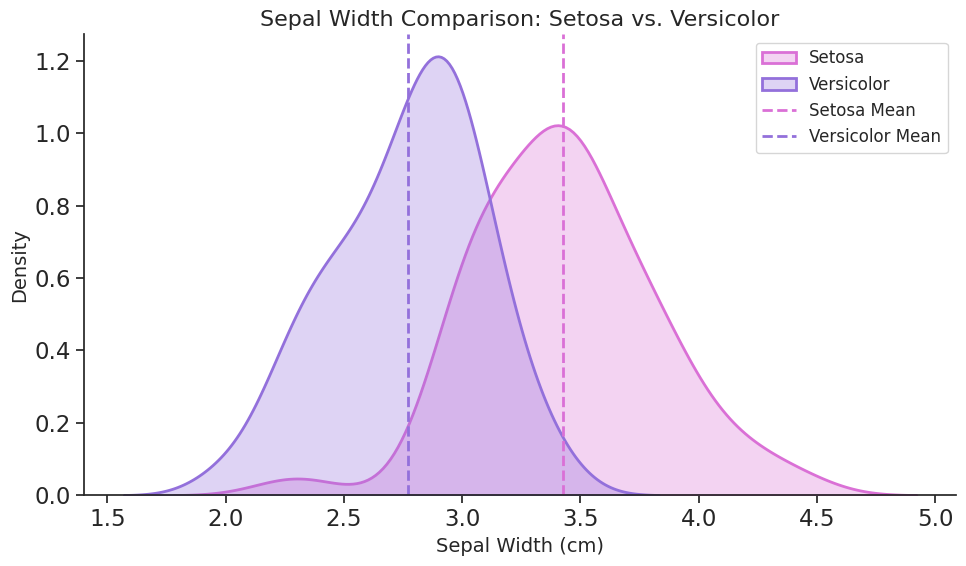

In [8]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Extract sepal width data for the two groups
setosa_sepal_width = iris_df[iris_df['species'] == 'setosa']['sepal width (cm)']
versicolor_sepal_width = iris_df[iris_df['species'] == 'versicolor']['sepal width (cm)']

# Perform a two-sample t-test (two-tailed)
t_stat, p_value_two_tailed = ttest_ind(setosa_sepal_width, versicolor_sepal_width, alternative='two-sided')

# Convert to one-tailed p-value (testing "greater than")
if t_stat > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

# Output results
print("One-Tailed T-Test:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"One-Tailed P-Value: {p_value_one_tailed:.4f}")

# Interpretation
alpha = 0.05
if p_value_one_tailed <= alpha:
    print("Conclusion: Reject the null hypothesis. The average sepal width of setosa is significantly greater than that of versicolor.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant evidence that the sepal width of setosa is greater than that of versicolor.")
print('\n')

# Set Seaborn theme, style, and palette
theme_style = "ticks"
palette_name = "Pastel1_r"
context_scale = "notebook"

sns.set_theme(style=theme_style, palette=palette_name)
sns.set_context(context_scale, font_scale=1.5, rc={"lines.linewidth": 2.5})

# Visualization
plt.figure(figsize=(10, 6))

# KDE plot for each species
sns.kdeplot(setosa_sepal_width, fill=True, alpha=0.3, linewidth=2, label="Setosa", color="orchid")
sns.kdeplot(versicolor_sepal_width, fill=True, alpha=0.3, linewidth=2, label="Versicolor", color="mediumpurple")

# Add vertical lines for the means
plt.axvline(x=setosa_sepal_width.mean(), color="orchid", linestyle="--", linewidth=2, label="Setosa Mean")
plt.axvline(x=versicolor_sepal_width.mean(), color="mediumpurple", linestyle="--", linewidth=2, label="Versicolor Mean")

# Customize the plot
plt.title("Sepal Width Comparison: Setosa vs. Versicolor", fontsize=16)
plt.xlabel("Sepal Width (cm)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12, loc="upper right")
sns.despine()
plt.tight_layout()
plt.show()


### **Question**  
Is the average petal width of `virginica` significantly greater than that of `versicolor`?

---

### **One-Tailed T-Test**  
- **Null Hypothesis (\(H_0\))**: The average petal width of `virginica` is less than or equal to the average petal width of `versicolor`.  
- **Alternative Hypothesis (\(H_1\))**: The average petal width of `virginica` is greater than the average petal width of `versicolor`.

---

### **Results**  
- **T-Statistic**: \(14.63\)  
- **One-Tailed P-Value**: \(0.0000\)  

---

### **Interpretation**
- The p-value (\(0.0000\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  
- This means that the average petal width of `virginica` is significantly greater than that of `versicolor`.

---

### **Visualization Summary**  
- The KDE plot shows distinct distributions for `virginica` and `versicolor` petal widths, with `virginica` clearly shifted to the right, indicating larger values.  
- The dashed mean lines further confirm that the mean petal width of `virginica` is notably greater than that of `versicolor`.

---

### **Conclusion**  
The statistical and visual analysis confirms that the average petal width of `virginica` is significantly greater than that of `versicolor`. This directional hypothesis is strongly supported by the data.



One-Tailed T-Test:
T-Statistic: 14.63
One-Tailed P-Value: 0.0000
Conclusion: Reject the null hypothesis. The average petal width of virginica is significantly greater than that of versicolor.




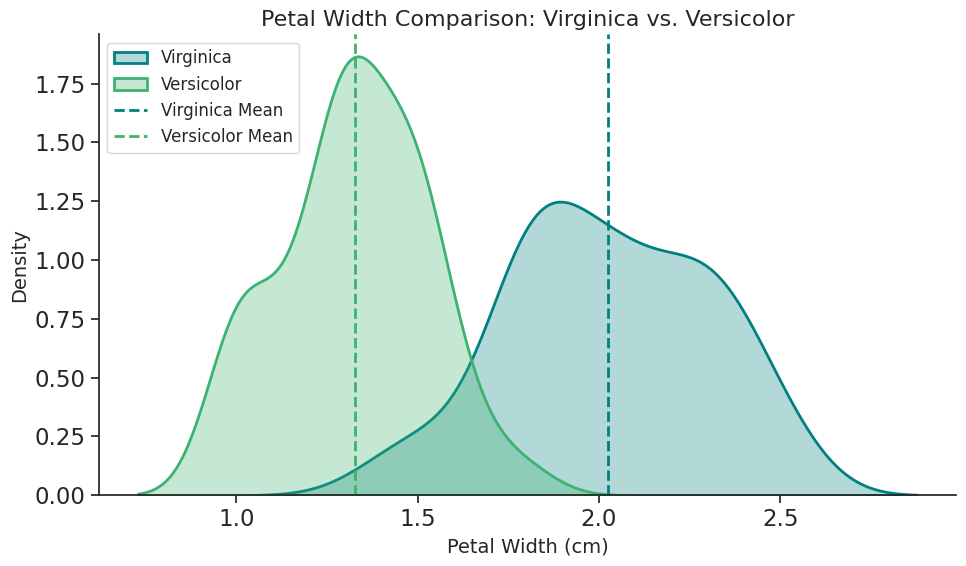

In [9]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Extract petal width data for the two groups
virginica_petal_width = iris_df[iris_df['species'] == 'virginica']['petal width (cm)']
versicolor_petal_width = iris_df[iris_df['species'] == 'versicolor']['petal width (cm)']

# Perform a two-sample t-test (two-tailed)
t_stat, p_value_two_tailed = ttest_ind(virginica_petal_width, versicolor_petal_width, alternative='two-sided')

# Convert to one-tailed p-value (testing "greater than")
if t_stat > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

# Output results
print("One-Tailed T-Test:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"One-Tailed P-Value: {p_value_one_tailed:.4f}")

# Interpretation
alpha = 0.05
if p_value_one_tailed <= alpha:
    print("Conclusion: Reject the null hypothesis. The average petal width of virginica is significantly greater than that of versicolor.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant evidence that the petal width of virginica is greater than that of versicolor.")
print('\n')

# Set Seaborn theme, style, and palette
theme_style = "ticks"
palette_name = "Pastel1_r"
context_scale = "notebook"

sns.set_theme(style=theme_style, palette=palette_name)
sns.set_context(context_scale, font_scale=1.5, rc={"lines.linewidth": 2.5})

# Visualization
plt.figure(figsize=(10, 6))

# KDE plot for each species
sns.kdeplot(virginica_petal_width, fill=True, alpha=0.3, linewidth=2, label="Virginica", color="teal")
sns.kdeplot(versicolor_petal_width, fill=True, alpha=0.3, linewidth=2, label="Versicolor", color="mediumseagreen")

# Add vertical lines for the means
plt.axvline(x=virginica_petal_width.mean(), color="teal", linestyle="--", linewidth=2, label="Virginica Mean")
plt.axvline(x=versicolor_petal_width.mean(), color="mediumseagreen", linestyle="--", linewidth=2, label="Versicolor Mean")

# Customize the plot
plt.title("Petal Width Comparison: Virginica vs. Versicolor", fontsize=16)
plt.xlabel("Petal Width (cm)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12, loc="upper left")
sns.despine()
plt.tight_layout()
plt.show()
